This research involved the use of Secondary Data gotten from https://fenixservices.fao.org/faostat/static/bulkdownloads/Food_Security_Data_E_All_Data.zip  from FAOSTAT https://www.fao.org/faostat/en/#data/FS/visualize 
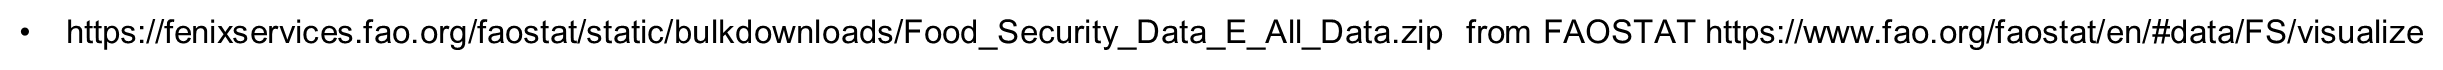 

The research goal is to use Prevalence of Undernourishment as Predictor Model Based on 10 Features as a determinant for Food Inseucrity Analyses and Prediction System Model with the use of Regression Models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [7]:
data = pd.read_csv('project data.csv')
data

,Year,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
0,2000-2002,8.9,0.9,121,7.0,64.0,15.4,48.2,4.0,2977.0,15.2,-1.46,17
1,2001-2003,8.9,0.9,121,8.0,63.0,15.7,49.3,4.2,3075.0,16.0,-1.63,24
2,2002-2004,8.6,0.8,122,8.0,63.0,16.1,50.7,4.4,3458.1,15.5,-1.63,33
3,2003-2005,7.9,0.8,123,6.0,63.0,16.4,52.1,4.7,3619.1,16.4,-1.75,37
4,2004-2006,7.1,0.8,125,6.0,63.0,16.7,53.5,4.9,3854.0,16.1,-1.67,30
5,2005-2007,6.7,0.8,127,6.0,63.0,17.0,54.9,5.2,3997.4,16.4,-2.03,19
6,2006-2008,6.6,0.8,127,6.0,63.0,17.3,56.3,5.4,4130.4,15.1,-2.01,38
7,2007-2009,6.8,0.8,126,6.0,64.0,17.6,57.6,5.7,4288.3,15.7,-1.86,51
8,2008-2010,7.3,0.9,125,6.0,65.0,17.9,59.0,6.0,4458.6,16.8,-2.00,50
9,2009-2011,7.8,0.9,124,7.0,66.0,18.1,60.4,6.4,4690.4,19.2,-2.21,33


# Number of Missing Values

In [8]:
data.isnull().sum()

Year                                                                                                     0
Prevalence of undernourishment (percent) (3-year average) %                                              0
Percent of arable land equipped for irrigation (percent) (3-year average) %                              2
Average dietary energy supply adequacy (percent) (3-year average) %                                      0
Value of food imports in total merchandise exports (percent) (3-year average) %                          1
Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)    2
Percentage of population using safely managed drinking water services (Percent)                          1
Percentage of population using at least basic drinking water services (percent)                          1
Prevalence of obesity in the adult population (18 years and older)                                       2
Gross domestic product per capita, PP

# Take care of missing data

In [9]:
data_new = data.copy()
data_new

,Year,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
0,2000-2002,8.9,0.9,121,7.0,64.0,15.4,48.2,4.0,2977.0,15.2,-1.46,17
1,2001-2003,8.9,0.9,121,8.0,63.0,15.7,49.3,4.2,3075.0,16.0,-1.63,24
2,2002-2004,8.6,0.8,122,8.0,63.0,16.1,50.7,4.4,3458.1,15.5,-1.63,33
3,2003-2005,7.9,0.8,123,6.0,63.0,16.4,52.1,4.7,3619.1,16.4,-1.75,37
4,2004-2006,7.1,0.8,125,6.0,63.0,16.7,53.5,4.9,3854.0,16.1,-1.67,30
5,2005-2007,6.7,0.8,127,6.0,63.0,17.0,54.9,5.2,3997.4,16.4,-2.03,19
6,2006-2008,6.6,0.8,127,6.0,63.0,17.3,56.3,5.4,4130.4,15.1,-2.01,38
7,2007-2009,6.8,0.8,126,6.0,64.0,17.6,57.6,5.7,4288.3,15.7,-1.86,51
8,2008-2010,7.3,0.9,125,6.0,65.0,17.9,59.0,6.0,4458.6,16.8,-2.00,50
9,2009-2011,7.8,0.9,124,7.0,66.0,18.1,60.4,6.4,4690.4,19.2,-2.21,33


In [11]:
data_new = data_new.drop(data_new.index[19])
data_new

IndexError: index 19 is out of bounds for axis 0 with size 19

In [12]:
data_new.shape

(19, 13)

# The Descriptive Analysis 

In [13]:
# rename the columns.
data_new.describe()

,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
count,19.000000,17.000000,19.000000,18.000000,17.000000,18.000000,18.000000,17.000000,19.000000,16.000000,19.000000,19.000000
mean,8.721053,0.864706,122.631579,7.944444,65.058824,17.916667,59.716667,6.188235,4508.400000,17.431250,-1.910526,30.210526
std,1.827743,0.049259,2.564946,2.508157,1.951621,1.479765,7.350250,1.556391,825.547682,1.856778,0.198592,9.548583
min,6.600000,0.800000,118.000000,6.000000,63.000000,15.400000,48.200000,4.000000,2977.000000,15.100000,-2.210000,14.000000
25%,7.550000,0.800000,121.000000,6.000000,63.000000,16.775000,53.850000,4.900000,3925.700000,15.925000,-2.035000,24.000000
50%,8.800000,0.900000,122.000000,7.000000,65.000000,18.000000,59.700000,6.000000,4690.400000,16.600000,-1.960000,30.000000
75%,9.250000,0.900000,124.500000,8.750000,66.000000,19.125000,65.575000,7.400000,5172.750000,19.200000,-1.805000,33.000000
max,14.600000,0.900000,127.000000,14.000000,68.000000,20.100000,71.400000,8.900000,5516.400000,20.300000,-1.460000,51.000000


# Fill in The  Missing Values

In [76]:
data_new.isnull()

,Year,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# find ways to fill data
data_new = data_new.interpolate(method='linear', limit_direction='forward')
data_new

,Year,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
0,2000-2002,8.9,0.9,121,7.0,64.0,15.4,48.2,4.0,2977.0,15.2,-1.46,17
1,2001-2003,8.9,0.9,121,8.0,63.0,15.7,49.3,4.2,3075.0,16.0,-1.63,24
2,2002-2004,8.6,0.8,122,8.0,63.0,16.1,50.7,4.4,3458.1,15.5,-1.63,33
3,2003-2005,7.9,0.8,123,6.0,63.0,16.4,52.1,4.7,3619.1,16.4,-1.75,37
4,2004-2006,7.1,0.8,125,6.0,63.0,16.7,53.5,4.9,3854.0,16.1,-1.67,30
5,2005-2007,6.7,0.8,127,6.0,63.0,17.0,54.9,5.2,3997.4,16.4,-2.03,19
6,2006-2008,6.6,0.8,127,6.0,63.0,17.3,56.3,5.4,4130.4,15.1,-2.01,38
7,2007-2009,6.8,0.8,126,6.0,64.0,17.6,57.6,5.7,4288.3,15.7,-1.86,51
8,2008-2010,7.3,0.9,125,6.0,65.0,17.9,59.0,6.0,4458.6,16.8,-2.00,50
9,2009-2011,7.8,0.9,124,7.0,66.0,18.1,60.4,6.4,4690.4,19.2,-2.21,33


In [15]:
data_new.columns.values

array(['Year',
       'Prevalence of undernourishment (percent) (3-year average) %',
       'Percent of arable land equipped for irrigation (percent) (3-year average) %',
       'Average dietary energy supply adequacy (percent) (3-year average) %',
       'Value of food imports in total merchandise exports (percent) (3-year average) %',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Prevalence of obesity in the adult population (18 years and older)',
       'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Political stability and absence of violence/terrorism (index)',
       'Per capita food supply variability (kcal/cap/day

# EXPLORE THE PDFS

C:\Users\Emmanuel Aminu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Prevalence of undernourishment (percent) (3-year average) %', ylabel='Density'>

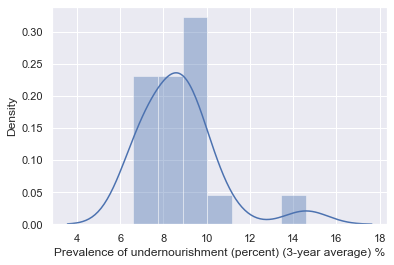

In [16]:
sns.distplot(data_new['Prevalence of undernourishment (percent) (3-year average) %'])

C:\Users\Emmanuel Aminu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Percent of arable land equipped for irrigation (percent) (3-year average) %', ylabel='Density'>

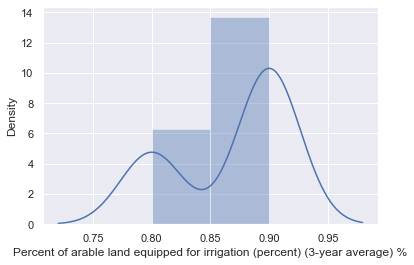

In [17]:
sns.distplot(data_new['Percent of arable land equipped for irrigation (percent) (3-year average) %'])

In [18]:
log_place = np.log(data_new['Percent of arable land equipped for irrigation (percent) (3-year average) %'])


data_new

,Year,Prevalence of undernourishment (percent) (3-year average) %,Percent of arable land equipped for irrigation (percent) (3-year average) %,Average dietary energy supply adequacy (percent) (3-year average) %,Value of food imports in total merchandise exports (percent) (3-year average) %,"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Percentage of population using safely managed drinking water services (Percent),Percentage of population using at least basic drinking water services (percent),Prevalence of obesity in the adult population (18 years and older),"Gross domestic product per capita, PPP, dissemination (constant 2011 international $)",Cereal import dependency ratio (percent) (3-year average),Political stability and absence of violence/terrorism (index),Per capita food supply variability (kcal/cap/day)
0,2000-2002,8.9,0.9,121,7.0,64.0,15.4,48.2,4.0,2977.0,15.2,-1.46,17
1,2001-2003,8.9,0.9,121,8.0,63.0,15.7,49.3,4.2,3075.0,16.0,-1.63,24
2,2002-2004,8.6,0.8,122,8.0,63.0,16.1,50.7,4.4,3458.1,15.5,-1.63,33
3,2003-2005,7.9,0.8,123,6.0,63.0,16.4,52.1,4.7,3619.1,16.4,-1.75,37
4,2004-2006,7.1,0.8,125,6.0,63.0,16.7,53.5,4.9,3854.0,16.1,-1.67,30
5,2005-2007,6.7,0.8,127,6.0,63.0,17.0,54.9,5.2,3997.4,16.4,-2.03,19
6,2006-2008,6.6,0.8,127,6.0,63.0,17.3,56.3,5.4,4130.4,15.1,-2.01,38
7,2007-2009,6.8,0.8,126,6.0,64.0,17.6,57.6,5.7,4288.3,15.7,-1.86,51
8,2008-2010,7.3,0.9,125,6.0,65.0,17.9,59.0,6.0,4458.6,16.8,-2.00,50
9,2009-2011,7.8,0.9,124,7.0,66.0,18.1,60.4,6.4,4690.4,19.2,-2.21,33


C:\Users\Emmanuel Aminu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Percent of arable land equipped for irrigation (percent) (3-year average) %', ylabel='Density'>

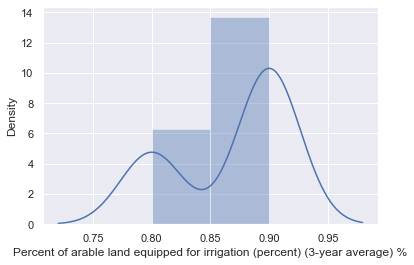

In [19]:
sns.distplot(data_new['Percent of arable land equipped for irrigation (percent) (3-year average) %'])

# compare y = POU and X = Value of imports for testing regression.

In [20]:
# scale this data.
y = data_new['Prevalence of undernourishment (percent) (3-year average) %']
x1 = data_new[['Average dietary energy supply adequacy (percent) (3-year average) %']]

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()
scaler.fit(x1)

StandardScaler()

In [23]:
x_scaled = scaler.transform(x1)

In [24]:
x = sm.add_constant(x_scaled)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\Emmanuel Aminu\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 OLS Regression Results                                                
=======================================================================================================================
Dep. Variable:     Prevalence of undernourishment (percent) (3-year average) %   R-squared:                       0.791
Model:                                                                     OLS   Adj. R-squared:                  0.779
Method:                                                          Least Squares   F-statistic:                     64.36
Date:                                                         Tue, 14 Dec 2021   Prob (F-statistic):           3.51e-07
Time:                                                                 16:34:32   Log-Likelihood:                -23.031
No. Observations:                                                           19   AIC:                             50.06
Df Residuals:                                                               17   BIC:                             51.95
Df Model:                                                                    1                                         
Covariance Type:                                                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7211      0.197     44.217      0.000       8.305       9.137
x1            -1.5822      0.197     -8.022      0.000      -1.998      -1.166
==============================================================================
Omnibus:                       28.152   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.004
Skew:                           2.384   Prob(JB):                     2.28e-11
Kurtosis:                       9.259   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Creating a regression works in the exact same way
reg = LinearRegression()

# We just need to specify that our inputs are the 'scaled inputs'
reg.fit(x_scaled,y)

LinearRegression()

In [26]:
reg.coef_

array([-1.5822484])

In [27]:
reg.intercept_

8.721052631578946

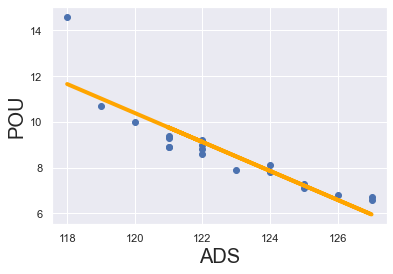

In [28]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x1,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_scaled + reg.intercept_


# Plotting the regression line
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('ADS', fontsize = 20)
plt.ylabel('POU', fontsize = 20)
plt.show()

In [24]:
# As usual we can try to arrange the information in a summary table
# Let's create a new data frame with the names of the features
# reg_summary = pd.DataFrame([['Bias'],['ADES'],['Import Value'], ['Political Staility'], ['GDP'], ['Cereal Dependency']], columns=['Features'])

# Then we create and fill a second column, called 'Weights' with the coefficients of the regression
# Since the standardized coefficients are called 'weights' in ML, this is a much better word choice for our case
# Note that even non-standardized coeff. are called 'weights' 
# but more often than not, when doing ML we perform some sort of scaling
# reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4] 

,Features,Weights
0,Bias,8.721053
1,ADES,-2.115026
2,Import Value,-0.477760
3,Political Staility,-0.270644
4,GDP,1.020672
5,Cereal Dependency,-1.015365


# CEREALS DIDN'T pass the linear regression assumption

In [25]:
y = data_new['Prevalence of undernourishment (percent) (3-year average) %']
x1 = data_new['Cereal import dependency ratio (percent) (3-year average)']

# try train and test

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2)

In [32]:
# use the regression model for the dataset
reg=LinearRegression() #creat the object for the regression
reg.fit(X_train, y_train)  #pass the data through the model, reg.fit(1st argument, 2nd argument);
            #1st argument have to be two dimentional or 2D array
            #2nd argument have to be y axis or the output, since y=mx+c

LinearRegression()

In [33]:
predictions = reg.predict(X_test)
predictions

array([ 8.83548387,  9.33817204, 10.84623656,  6.32204301])

In [34]:
y_test

2      8.6
13     9.3
18    14.6
5      6.7
Name: Prevalence of undernourishment (percent) (3-year average) %, dtype: float64

In [30]:
reg.score(X_test, y_test)

0.9461554594400747

In [35]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.1013440860215054
MSE: 3.5726253035032984
RMSE: 1.8901389640720332


C:\Users\Emmanuel Aminu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


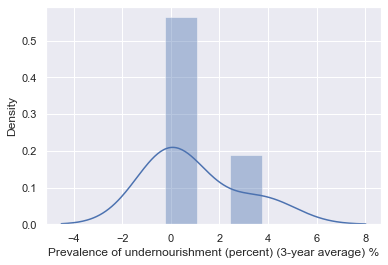

In [36]:
sns.distplot((y_test-predictions));

# USING REGRESSION MODELS

In [33]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    # print(clf.predict(X_test),'\n')
    y_pred = clf.predict(X_test)
    print(y_pred, '\n')
    print("The mean absolute error {}".format(mean_absolute_error(y_test, y_pred),'\n'))
    print("The mean square error {}".format(mean_squared_error(y_test, y_pred),'\n'))
    print("The r2 score {}".format(r2_score(y_test, y_pred),'\n'))

SVR()
[7.95884117 6.9056222  7.40022228 9.19956323] 

The mean absolute error 0.19128060356654686
The mean square error 0.041673720146296805
The r2 score 0.958815347600942
SGDRegressor()
[7.63656845 6.29903668 6.96780257 9.64286612] 

The mean absolute error 0.2598646062361505
The mean square error 0.08853355903342919
The r2 score 0.9125054388798723
BayesianRidge()
[7.88478455 6.62876672 7.25677564 9.76881129] 

The mean absolute error 0.19540118847771026
The mean square error 0.04927740582513039
The r2 score 0.9513008960344604
LassoLars()
[8.97333333 8.97333333 8.97333333 8.97333333] 

The mean absolute error 1.4116666666666666
The mean square error 2.447877777777777
The r2 score -1.4191503671676595
ARDRegression()
[7.88478455 6.62876672 7.25677564 9.76881129] 

The mean absolute error 0.19540118847771026
The mean square error 0.04927740582513039
The r2 score 0.9513008960344604
PassiveAggressiveRegressor()
[7.39011522 6.52224214 6.95617868 8.69192485] 

The mean absolute error 0.38488

# VISUALISATION OF RESULTS

Text(0.5, 1.0, 'Year to GDP')

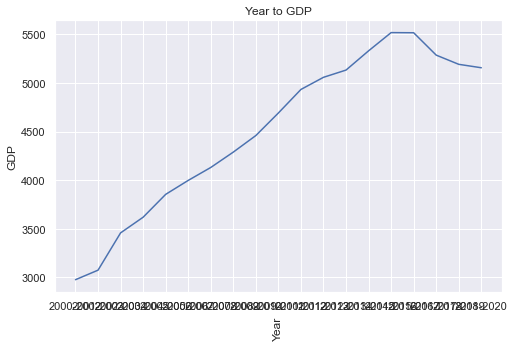

In [75]:
%matplotlib inline
plt.figure(figsize=[8, 5])
plt.plot(data_new['Year'], data_new['Gross domestic product per capita, PPP, dissemination (constant 2011 international $)'])
plt.xlabel('Year', rotation = 'vertical')
plt.ylabel('GDP')
plt.title('Year to GDP')

Text(0.5, 1.0, 'Prevalence of Undernourishment to GDP')

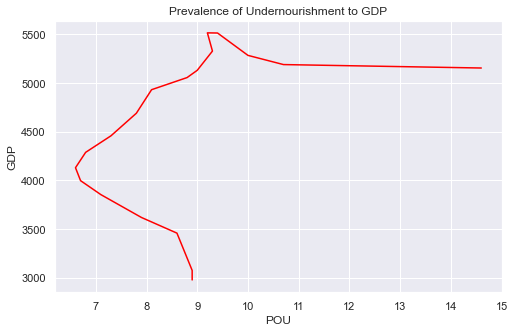

In [38]:
plt.figure(figsize=[8, 5])
plt.plot(data_new['Prevalence of undernourishment (percent) (3-year average) %'], data_new['Gross domestic product per capita, PPP, dissemination (constant 2011 international $)'], color = 'Red')
plt.xlabel('POU')
plt.ylabel('GDP')
plt.title('Prevalence of Undernourishment to GDP')

In [44]:
ypos = np.arange(len(data_new['Year']))
ypos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

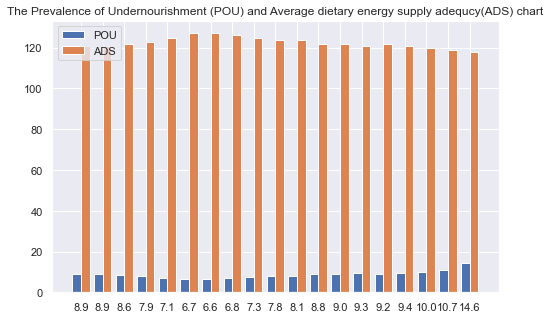

In [86]:
plt.figure(figsize=[8,5])
plt.xticks(ypos, data_new['Prevalence of undernourishment (percent) (3-year average) %'])
plt.bar(ypos-0.2, data_new['Prevalence of undernourishment (percent) (3-year average) %'], width=0.4, label='POU')
plt.bar(ypos+0.2, data_new['Average dietary energy supply adequacy (percent) (3-year average) %'], width=0.4, label='ADS')
plt.legend()
plt.title('The Prevalence of Undernourishment (POU) and Average dietary energy supply adequcy(ADS) chart')
plt.savefig('POUADS barchart.png')

Text(0, 0.5, 'POU and ADS')

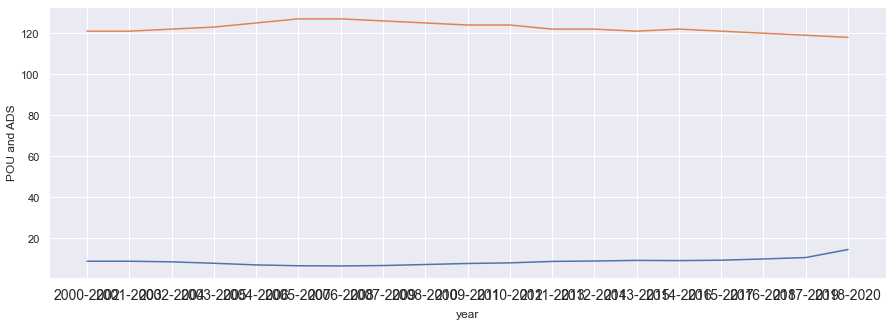

In [60]:
plt.figure(figsize=[15, 5])
plt.plot(data_new['Year'], data_new['Prevalence of undernourishment (percent) (3-year average) %'], data_new['Average dietary energy supply adequacy (percent) (3-year average) %'])
plt.xlabel('Year', labelpad= 8)
plt.xticks(fontsize=14)
plt.grid(True)
plt.ylabel('POU and ADS')




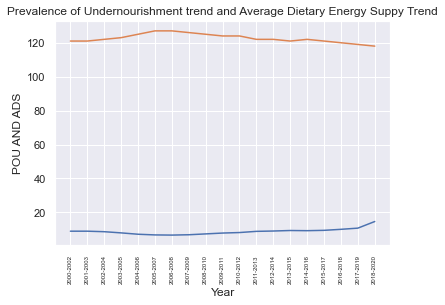

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [85]:
fig, ax = plt.subplots()
plt.figure(figsize = [10,10])
ax.plot(data_new['Year'], data_new['Prevalence of undernourishment (percent) (3-year average) %'], data_new['Average dietary energy supply adequacy (percent) (3-year average) %'])
fig.subplots_adjust(bottom=0.1)
ax.set_ylabel('POU AND ADS')
ax.set_xlabel('Year')
ax.set_title('Prevalence of Undernourishment trend and Average Dietary Energy Suppy Trend') 
ax.set_xticks(data_new['Year']) 
ax.set_xticklabels(data_new['Year'], rotation='vertical', fontsize=6)
plt.show()
plt.savefig('POUADS.png')

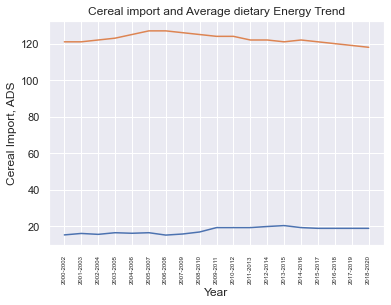

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [84]:
fig, ax = plt.subplots()
plt.figure(figsize = [10,10])
ax.plot(data_new['Year'], data_new['Cereal import dependency ratio (percent) (3-year average)'], data_new['Average dietary energy supply adequacy (percent) (3-year average) %'])
fig.subplots_adjust(bottom=0.1)
ax.set_ylabel('Cereal Import, ADS')
ax.set_xlabel('Year')
ax.set_title('Cereal import and Average dietary Energy Trend') 
ax.set_xticks(data_new['Year']) 
ax.set_xticklabels(data_new['Year'], rotation='vertical', fontsize=6)
plt.show()
plt.savefig('CAS.png')

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
results = [['Model', 'MAE']]


rndm_frst = RandomForestRegressor(n_estimators=300, random_state=0)

rndm_frst.fit(X_train, y_train)

y_pred = rndm_frst.predict(X_test)

print("MAE: " + str(mean_absolute_error(y_pred, y_test)))

results.append(['Random Forest Regressor', str(mean_absolute_error(y_pred, y_test))])

MAE: 1.2116588293650747
